____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Alumni Ciencia de Datos - Curso I5521 - Turno sábado mañana 2021__<br/>
__Elaborado por: Juan Gabriel Limachi Zuñagua y Darío Adrián Zabaljáuregui__<br/>
__[**Fuente**](https://github.com/darioadrianz/clusterAI_2021_group10)__<br/>
____

# clusterAI2021_group10_Siniestros_ML

In [3]:
# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')


In [4]:

# Machine Learning

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("Victimas_siniestros_2015-2018.csv")

/ext/anaconda2020.02/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Eliminamos los registros vacíos de las columnas con las que trabajaremos

df = df[df['edad'].notna()]
df = df[df['sexo'].notna()]
df = df[df['rol'].notna()]
df = df[df['tipo'].notna()]
df = df[df['mes'].notna()]
df = df[df['periodo'].notna()]
df = df[df['hora'].notna()]
df = df[df['cantidad_victimas'].notna()]
df = df[df['x'].notna()]
df = df[df['y'].notna()]
df = df[df['comuna'].notna()]

In [7]:
# Tomamos solo las columnas con las que trabajaremos

df_sin = df[['tipo','sexo','causa','x','y','cantidad_victimas','comuna','edad']] 

In [8]:
# Generamos un nuevo DF solo con los tipos de siniestros más recurrentes (top 5)

top5_tipo = ['moto', 'peaton', 'automovil', 'bicicleta', 'transporte publico']
df_sin_top = df_sin[df_sin["tipo"].isin(top5_tipo)]

In [9]:
x = df_sin_top.loc[:,['x', 'y', 'cantidad_victimas', 'edad', 'tipo', 'comuna','causa']]
y = df_sin_top.loc[:,['sexo']]

In [10]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

/ext/anaconda2020.02/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
x.head()

,x,y,cantidad_victimas,edad,tipo,comuna,causa
6,-58.377362,-34.617451,1,18.0,moto,1.0,homicidio
7,-58.469471,-34.629286,1,26.0,automovil,7.0,lesiones
8,-58.528416,-34.650157,1,24.0,moto,9.0,homicidio
10,-58.413389,-34.592807,1,37.0,moto,14.0,lesiones
11,-58.427485,-34.559184,3,19.0,automovil,14.0,homicidio


In [12]:
# genero las variables dummies par TIPO y CAUSA

x = pd.get_dummies(data=x, columns=['tipo','causa'])
#y = pd.get_dummies(data=y, columns=['tipo'])

In [13]:
x.head()

,x,y,cantidad_victimas,edad,comuna,tipo_automovil,tipo_bicicleta,tipo_moto,tipo_peaton,tipo_transporte publico,causa_homicidio,causa_lesiones
6,-58.377362,-34.617451,1,18.0,1.0,0,0,1,0,0,1,0
7,-58.469471,-34.629286,1,26.0,7.0,1,0,0,0,0,0,1
8,-58.528416,-34.650157,1,24.0,9.0,0,0,1,0,0,1,0
10,-58.413389,-34.592807,1,37.0,14.0,0,0,1,0,0,0,1
11,-58.427485,-34.559184,3,19.0,14.0,1,0,0,0,0,1,0


In [14]:
# obtenemos xtrain, xtest, ytrain e ytest
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=27, stratify=y)

In [15]:
# escalamos
norm = MinMaxScaler().fit(X_train)

In [16]:
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Logistic Regression

In [17]:
param_lr = {'C':[1, 10, 100, 1000], "penalty": ("l1", "l2"), "solver":("lbfgs", "liblinear")}
lr = LogisticRegression()  #regersion logistica
clf_lr = GridSearchCV(lr, param_grid = param_lr , scoring= 'accuracy', refit = True, cv = 3)
clf_lr.fit(X_train_norm, y_train.ravel())

/ext/anaconda2020.02/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/ext/anaconda2020.02/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/ext/anaconda2020.02/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/ext/anaconda2020.02/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/ext/anaconda2020.02/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit 

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ('l1', 'l2'),
                         'solver': ('lbfgs', 'liblinear')},
             scoring='accuracy')

In [18]:
scores = clf_lr.cv_results_

In [19]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_lr.best_params_, clf_lr.best_score_))

Los mejores paramentros son {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} con un score de 0.71


# SVM

In [20]:
svreg = SVR()

In [21]:
param_svreg = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'gamma':[0.1,1]}

In [22]:
# cv (cross validation) donde puso 3 por el tiempo que tomaba en correrlo

regressor_svr = GridSearchCV(svreg, param_svreg, cv=3, verbose=True) 

In [23]:
# entrenamos el set de entrenamiento con grisSearch q inicializamos
regressor_svr.fit(X_train_norm, y_train.ravel())

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  7.8min finished


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10], 'gamma': [0.1, 1],
                         'kernel': ('linear', 'rbf')},
             verbose=True)

In [24]:
scores = regressor_svr.cv_results_
print("Los mejores paramentros son %s con un score de %0.2f" % (regressor_svr.best_params_, regressor_svr.best_score_))

Los mejores paramentros son {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} con un score de 0.01


# KNN

In [17]:
neigh = KNeighborsClassifier()

In [18]:
param_neigh = {'n_neighbors':[1, 10, 100, 200]}

In [19]:
clf = GridSearchCV(neigh, param_grid = param_neigh,scoring= 'accuracy', refit = True, cv = 3)
clf.fit(X_train_norm, y_train.ravel())

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 10, 100, 200]}, scoring='accuracy')

In [20]:
scores = clf.cv_results_
print("Los mejores paramentros son %s con un score de %0.2f" % (clf.best_params_, clf.best_score_))

Los mejores paramentros son {'n_neighbors': 200} con un score de 0.72


# **Evaluamos el mejor modelo**

In [21]:
y_pred = clf.predict(X_test_norm)

In [22]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, y_pred)
print('el accuracy es' + str(test_acc))

el accuracy es0.7144580389453731


In [23]:
#compute and plot AUC
yproba = clf.predict_proba(X_test_norm)
fpr1, tpr1, thresholds = roc_curve(y_test.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.7308693653939112


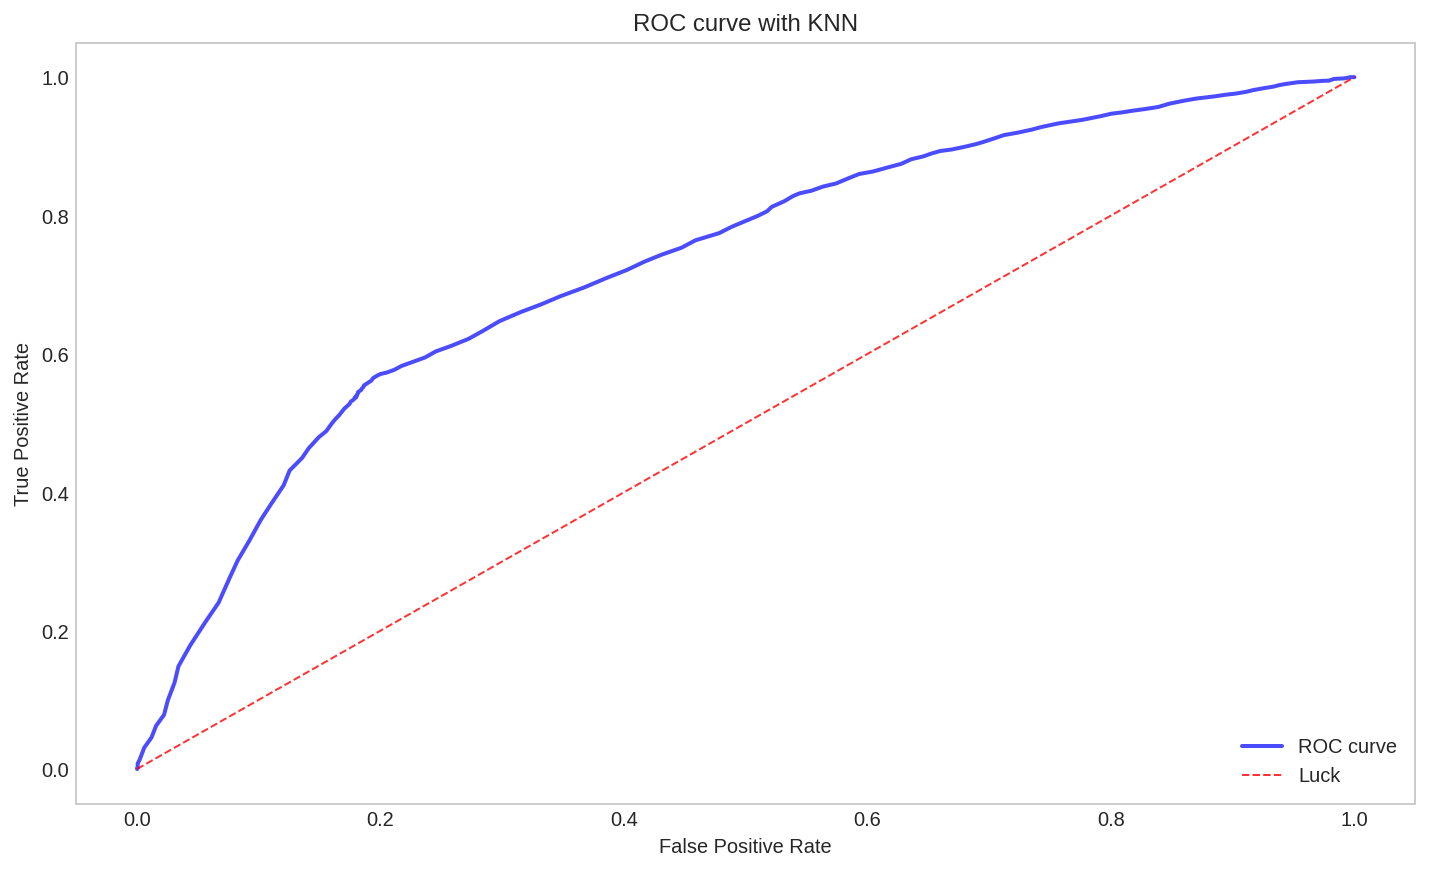

In [24]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

In [25]:
# Compute confusion Matrix
matcof = confusion_matrix(y_test, y_pred)
matcof

array([[ 708, 1143],
       [ 514, 3438]])

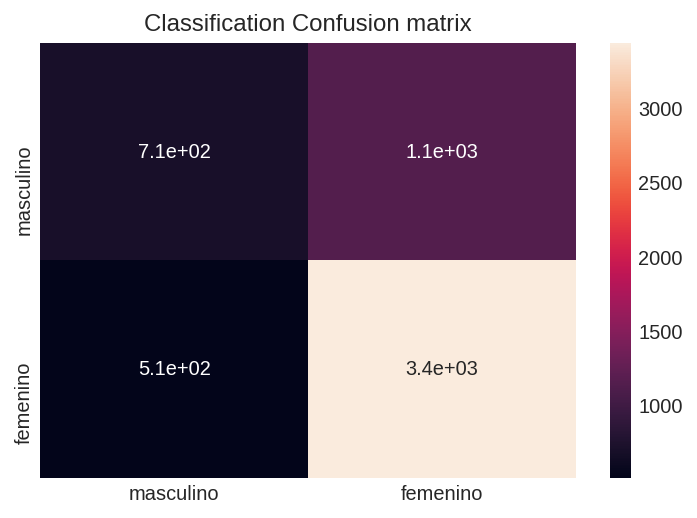

In [26]:
df_matcof = pd.DataFrame(matcof, index = ['masculino', 'femenino'], columns = ['masculino', 'femenino'])
plt.figure(figsize = (6,4))
sns.heatmap(df_matcof, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

In [28]:
# calculate error
results = pd.DataFrame(columns=['Model','RSME','MSE','MAE'])

knn_rsme = np.sqrt(mean_squared_error(y_test, y_pred))
knn_mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
knn_mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

results = results.append({'Model':'KNN',
                                'RSME':knn_rsme,
                                'MSE':knn_mse,
                                'MAE':knn_mae},ignore_index=True)
results

,Model,RSME,MSE,MAE
0,KNN,0.534361,0.285542,0.285542
